
# Projeto de Random Forests

### Apresentação:
O LendingClub é uma plataforma de empréstimos americana onde pessoas podem encontrar outras pessoas para pegar empréstimos pessoais. Os dados da plataforma são de 2007 a 2010, oferecidos pela empresa pelo [link](https://www.lendingclub.com/info/download-data.action)

### Objetivo:

Nesse projeto vamos criar um modelo para predizer a probabilidade dos clientes conseguirem pagar completamente um empréstimo feito pela plataforma.

### Significado das Colunas:
* credit.policy: 1 se o cliente atende os requisitos necessários para poder aplicar por um empréstimo no LendingClub.com. 0 se não.
* purpose: O proósito (objetivo) do empréstimo. Pode conter os seguintes valores ("credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").
* int.rate: A taxa de juros do empréstimo, em decimal. Pessoas que são julgadas arriscadas para receber empréstimo recebem juros mais altos.
* installment: O valor da prestação devido pelo recebedor do empréstimo se o empréstimo é aprovado
* log.annual.inc: O registro reportado pelo recebedor do empréstimo  de sua renda anual.
* dti: A quantidade de dívida dividido pela renda anual.
* fico: a pontuação FICO do recebedor do empréstimo .
* days.with.cr.line: O número de dias que o recebedor do empréstimo  tem tido uma linha de crédito.
* revol.bal: Quantidade não paga ao fim do ciclo de pagamento de crédito. (recebedor do empréstimo.)
* revol.util: Uso de quantidade de crédito pelo recebedor do empréstimo relativa ao total de crédito disponível
* inq.last.6mths: O número de consulta de credores nos útimos 6 meses (recebedor do empréstimo)
* delinq.2yrs: O número de vezes que o recebedor de empréstimo atrasou mais de 30 dias o pagamento nos ultimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do recebedor do empréstimo (pedidos de falência, penhoras fiscais ou julgamentos).

# Bibliotecas Utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Recuperando os Dados

In [3]:
loans = pd.read_csv('../datasets/loan_data.csv')

Verificando a estrutura dos arquivos para posterior análise

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análise Exploratória

Vamos verificar a pontuação FICO daqueles que atendem (1) ou não atendem (0) os critérios para um empréstimo no LendingClub


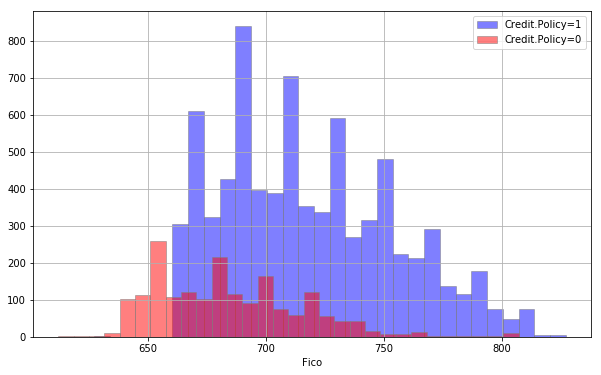

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1', ec='grey')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0', ec='grey')
plt.legend()
plt.xlabel('Fico')
plt.show()

#### Análise inicial

* Parece que existe uma política de crédito mímino para aplicar para o Lendig Club
* Quanto maior a pontuação FICO menor a quantidade de pessoas fazendo empréstimo e também menor a taxa de rejeição.

---
### FICO x Pagamento Completo
Vamos verificar agora a frequencia do pagamento completo do empréstimo também baseado na pontuação FICO

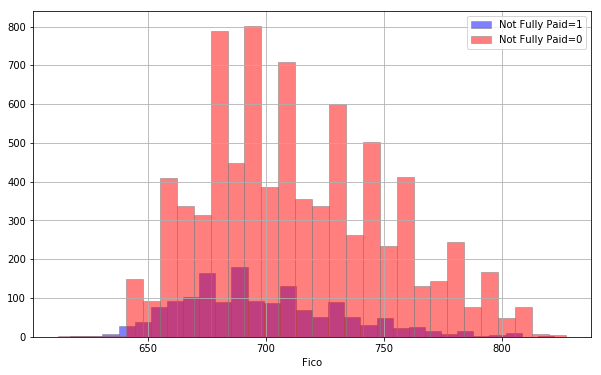

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Not Fully Paid=1', ec='grey')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Not Fully Paid=0', ec='grey')
plt.legend()
plt.xlabel('Fico')
plt.show()

#### Análise Inicial
* Conforme esperado, quanto maior o crédito menor a taxa de inadimplência.
* A proporção de pessoas que não pagam completamente seus empréstimos na taxa dos 200~680 é bastante alta. Isso pode ser um problema para o negócio.

---
### Quantidade por  Propósito vs Pago por completo

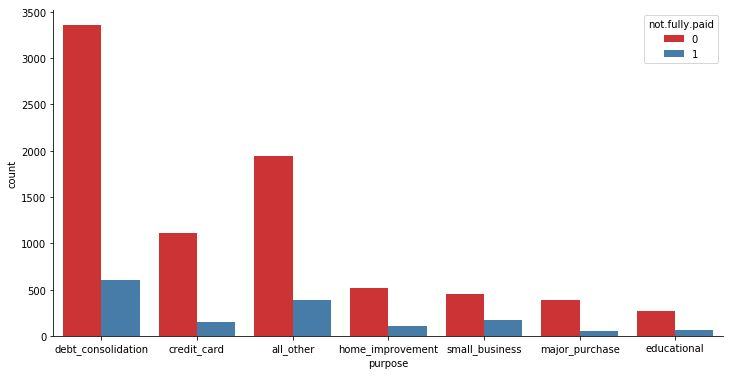

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=loans, hue='not.fully.paid', x=loans['purpose'], palette='Set1')
sns.despine()

#### Análise Inicial
* Podemos verificar que pegar empréstimos para pagar dívidas é o tipo mais comum utilizado na plataforma. Por consequencia, também tem a maior taxa de inadimplência.
* Podemos verificar que proporcionalmente, a categoria 'small_business' tem uma proporção de inadimplência bastante alta em relação à quantidade de empréstimos retirados.

---
### Frequência de potuação de crédito vs Taxa de juros

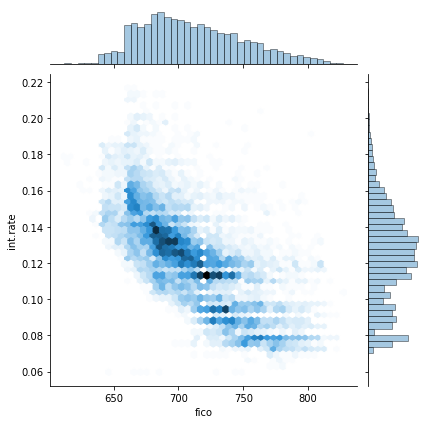

In [7]:
plt.rcParams["patch.force_edgecolor"] = True

sns.jointplot(data=loans, x='fico', y='int.rate',kind='hex')

#### Análise Inicial
* Visto a representação acima, conseguimos identificar que pessoas com maior taxa de juros também tem o menor crédito, e o contrário também é verdade.
* Também analisando a situação acima, coseguimos olhando para o gráfico identificar a taxa de juros mais comum para cada faixa de crédito

---
# Organizando os Dados para Treinamento

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Features Categóricas

Neste ponto, a feature 'purpose' é uma variável categórica, então iremos transformá-la em uma variável verdadeiro ou falso para cada uma das possibilidades e eliminar a primeira para que o nosso modelo não tenha variação tendenciosa.

In [12]:
cat_feats = ['purpose']

In [13]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [14]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Separação dos Dados

In [9]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Treinando uma Árvore de Decisão


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predição e Avaliação das Árvores de Decisão

In [21]:
from sklearn.metrics import classification_report

In [22]:
pred = dtree.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.86      0.84      0.85      2430
          1       0.22      0.24      0.23       444

avg / total       0.76      0.75      0.75      2874



Temos resultados surpreendentemente bons com uma Árvore de decisão. Dado uma entrada sem o valor 'Not Fully Paid' conseguimos predizer com 86% de certeza a probalidade do recebedor do empréstimo pagar completamente a sua dívida.

## Treinando uma Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predição e Verificação

In [27]:
predict = rfc.predict(X_test)

In [28]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      2430
          1       0.30      0.05      0.09       444

avg / total       0.76      0.83      0.78      2874



Não tivemos um ganho significativo nesse caso para a utilização de Random Forests. A nossa árvore de decisão conseguiu prever muito bem os valores.

### Conclusão

Utilizando uma linha/entrada específica de dados, sem o valor final 'not.fully.paid' conseguimos verificar a probabilidade daquele empréstimo ser pago por completo.
Neste caso de estudo, o modelo pode ser aplicado para resolver problemas similares.